<a href="https://colab.research.google.com/github/PashaIanko/RestrictedBolzmannMachine/blob/main/Omniglot_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Packages, Constants & Functions**

In [8]:
# Preprocessing
CROP_SIZE_ = 90
MEAN_ = 0.5
STD_ = 0.5
IMG_SIZE_ = CROP_SIZE_

# Train
EPOCHS_ = 50
BATCH_SIZE_ = 200

In [2]:
%%capture

url_dbn = 'https://raw.githubusercontent.com/PashaIanko/RestrictedBolzmannMachine/main/DBN.py'
url_rbm = 'https://raw.githubusercontent.com/PashaIanko/RestrictedBolzmannMachine/main/RBM.py'

utils = {
    'DBN.py': url_dbn,
    'RBM.py': url_rbm
}

for file, url in utils.items():
    !wget -O {file} {url} {file}

In [3]:
import torch
import torchvision as tv
from torchvision import datasets

# Models
from DBN import DBN

# Plotting
import matplotlib.pyplot as plt

# Download
from google.colab import drive
from os import path

# Utils
import numpy as np
import random
import math

In [4]:
def fix_seeds():
    torch.manual_seed(0)
    random.seed(0)
    np.random.seed(0)

In [5]:
def visualize_symbols(dataset, n_subplots, image_shape):
    n_rows_cols = int(math.sqrt(n_subplots))
    fig, axes = plt.subplots(
        n_rows_cols, 
        n_rows_cols, 
        sharex = True,
        sharey = True,
        figsize = (10, 10)
    )
    for i in range(n_subplots):
        row = i % n_rows_cols
        col = i // n_rows_cols
        img, _ = dataset[i] 
        axes[row, col].imshow(torch.flatten(img).reshape(image_shape), cmap='binary')

## **Data Download**

- For neural networks, we need to scale data before learning
- Need to obtain tensor shape
- Fix seeds for reproducibility

In [6]:
%%capture 

fix_seeds()

transformer = tv.transforms.Compose(
    [
        tv.transforms.CenterCrop(CROP_SIZE_),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize(mean=(MEAN_,), std=(STD_),)
    ]
)

train = datasets.Omniglot(
    root = '/content/',
    download = True,
    background = True,
    transform = transformer
)

test = datasets.Omniglot(
    root = '/content/',
    download = True,
    background = False,
    transform = transformer
)

# import tensorflow_datasets as tfds 

# %%capture
# train = tfds.load("omniglot", 
#                   split = 'train', 
#                   as_supervised = False, 
#                   shuffle_files = False)
# %%capture
# test = tfds.load("omniglot",
#                  split = 'test',
#                  as_supervised = False,
#                  shuffle_files = False)

  0%|          | 0/9464212 [00:00<?, ?it/s]

Extracting /content/omniglot-py/images_background.zip to /content/omniglot-py


  0%|          | 0/6462886 [00:00<?, ?it/s]

Extracting /content/omniglot-py/images_evaluation.zip to /content/omniglot-py


Image shape = torch.Size([1, 90, 90]), 0


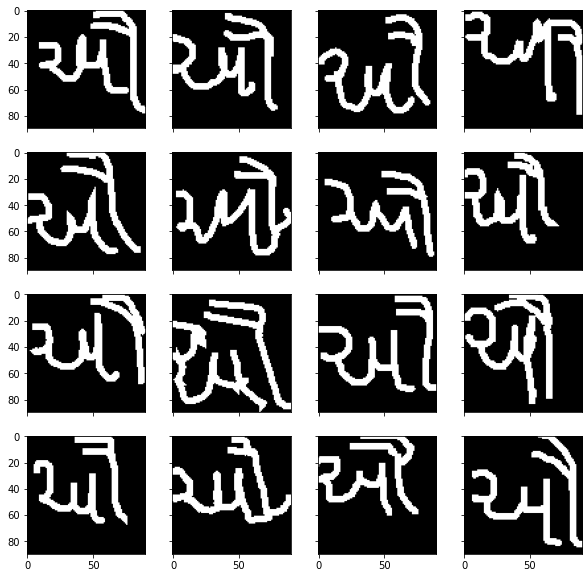

In [12]:
img, _ = train[0]
print(f'Image shape = {img.shape}')
visualize_symbols(train, 16, image_shape = (CROP_SIZE_, CROP_SIZE_))

In [38]:
# __getitem__ structure - tensor (image) + label (one label for 20 images of single letter)
train.__getitem__(600)

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]), 30)

In [48]:
labels = [item[1] for item in train]
images = [item[0] for item in train]

In [51]:
len(images), images[0]

(19280, tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]))

## **Deep Belief Network model**

- Deep Belief Network - a stack of Restricted Bolzmann Machines
    - RBM is a bipartite graph with input and hidden layer
    - Hidden layer captures dependencies and features
- Each layer learns more complex and abstract features
- Used as feature extraction method (generative model)
- No output neurons
- Two phases (negative & positive) during learning (reconstruction)




In [11]:
fix_seeds()

model = DBN(
    visible_units = IMG_SIZE_ * IMG_SIZE_,
    hidden_units = [500, 500, 1200],
    k = 1,
    learning_rate = 0.08,
    learning_rate_decay = False,
    initial_momentum = 0.5,
    final_momentum = 0.9,
    weight_decay = 0.00002,
    xavier_init = False,
    increase_to_cd_k = False,
    use_gpu = True
)

In [ ]:
model.train_static(
    train,
    train_targets

)